In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.listdir('.')

In [2]:
def transform_json(dataframe):    
    len_log = len(dataframe.values)
    json_total = [pd.concat([pd.read_json(dataframe.values[i][0],typ='series')]) for i in range(len_log)]
    df_final = pd.DataFrame(json_total)
    return df_final.groupby('status').count().reset_index()

def show_graphic(dataframe, subtitle, name_graphic):
    fg = plt.figure(figsize=(10, 3.5))
    plt.subplot(1,3, 1)
    plt.suptitle(subtitle,fontsize=20)
    plt.subplots_adjust(bottom=0.80)
    plt.plot(dataframe.delivery, dataframe.notification,color='g', marker='*', label='Notificaciones Exitosas')
    plt.ylabel('Cantidad Notificaciones exitosas')
    plt.xlabel('Cantidad de Notificaciones Enviadas')


    plt.title('Estado de Notificaciones')
    plt.subplot(1,3, 2)
    plt.hist(dataframe[~dataframe.status.isin(["SUCCESS"])], bins=1)
    plt.ylabel('Cantidad Notificaciones exitosas')
    plt.xlabel('Cantidad de Notificaciones Fallidas')
    plt.title('Estado de Notificaciones Fallidas')
    plt.yticks(ticks=[0.0, 0.5, 1.0], labels=['0%','5%','100%'])
    plt.tight_layout()

    plt.subplot(1,3, 3)
    plt.hist(dataframe[dataframe.status.isin(["SUCCESS"])].notification, bins=8)
    plt.xlabel('Cantidad Notificaciones exitosas')
    plt.title('Estado de Notificaciones Exitosas')
    plt.yticks(ticks=[0.0, 0.5, 1.0], labels=['0%','5%','100%'])
    plt.tight_layout()
    plt.show()
    fg.savefig(name_graphic)

def show_table(dataframe):
    dataframe.loc[1] = ['FAILED', len(dataframe[~dataframe.status.isin(["SUCCESS"])]), dataframe.delivery.values[0]]
    return dataframe

# Cliente 81880 - PAULO COELLO

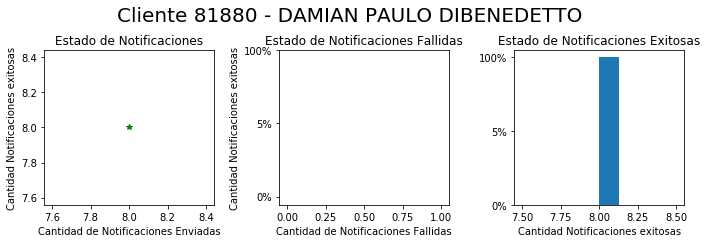

,status,notification,delivery
0,SUCCESS,8,8
1,FAILED,0,8


In [3]:
df1 = pd.read_csv('logs-insights-results_81880_1.csv')
df2 =  pd.read_csv('logs-insights-results_81880_2.csv')
df_total = pd.concat([df1, df2], axis = 0, join='outer', ignore_index=True)
df_status = transform_json(df_total)
show_graphic(df_status, 'Cliente 81880 - Paulo Coello', 'cliente 81880')
show_table(df_status)

# CLIENTE 274676 -  MARIA TEREZA DE CALCUTA

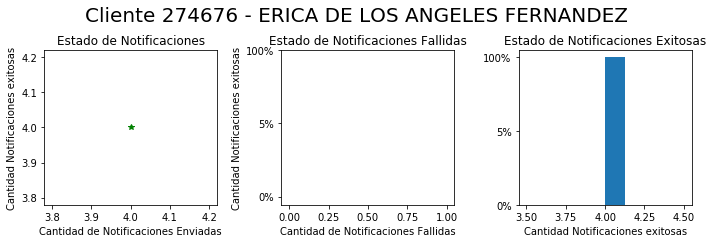

,status,notification,delivery
0,SUCCESS,4,4
1,FAILED,0,4


In [4]:
df_274676 = pd.read_csv('logs-insights-results_274676.csv')
df_status_274676 = transform_json(df_274676)
show_graphic(df_status_274676, 'Cliente 274676 - Maria Tereza Calcuta', 'cliente 274676')
show_table(df_status_274676)

# Cliente 279653 - Roberto Santos

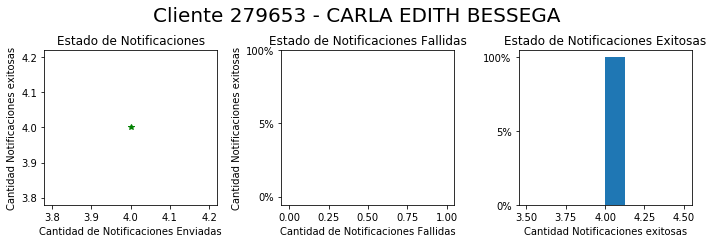

,status,notification,delivery
0,SUCCESS,4,4
1,FAILED,0,4


In [5]:
df_279653 = pd.read_csv('logs-insights-results_279653.csv')
df_status_279653 = transform_json(df_279653)
show_graphic(df_status_279653, 'Cliente 279653 - Roberto Santos', 'cliente 279653')
show_table(df_status_279653)